## Практическая работа №9
+ Язык программирования: Python
+ Создать тематическую модель

Решение:
+ Загрузить библиотеку genism.

In [51]:
%pip install gensim
%pip install pandarallel
%pip install pandas
%pip install beautifulsoup4
%pip install lxml

2082.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
2090.99s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


В качестве исходного набора данных будет использоваться набор:
+ Стандартный набор для машинного обучения – собрание текстов
новостей AP (Associated Press)
+ В наборе 2246 документов и они представлены в нужном для
моделирования формате.
+ В папке /ap представлены сами документы (ap.txt, ap.dat), словарь
(vocab.txt).

Файл ap.dat состоит из кол-ва слов и номеров слов из словаря и частот
записанных в формате 178:1.
В файле ap.txt хранятся исходные тексты.

In [2]:
import tarfile 

with tarfile.open('./ap.tgz') as archive:
    archive.extractall('./ap')

3 Для построения модели используется конструктор с большим
количеством параметров:
class gensim.models.ldamodel.LdaModel( corpus=None, num_topics=100,
id2word=None,
distributed=False,
update_every=1, alpha='symmetric', eta=None, decay=0.5, offset=1.0,
eval_every=10,
iterations=50,
minimum_probability=0.01,
random_state=None,
minimum_phi_value=0.01, per_word_topics=False, callbacks=None)
В примере используются параметры:
+ corpus – набор текстов,
+ id2word - используется для определения размера словаря,
+ alpha - по умолчанию 1/num_topics, чем меньше alpha, тем
меньше ожидаемое число тем для каждого документа, и
наоборот.

In [3]:
from gensim import corpora, models

corpus = corpora.BleiCorpus('./ap/ap/ap.dat', './ap/ap/vocab.txt')

In [4]:
model = models.ldamodel.LdaModel(corpus, id2word = corpus.id2word)

In [5]:
doc = corpus.docbyoffset(0) # первый документ
topics = model[doc]
print(topics)

[(1, 0.032615032), (5, 0.05318099), (30, 0.029775903), (40, 0.26630247), (56, 0.08690094), (57, 0.25299042), (61, 0.05664141), (71, 0.022992613), (72, 0.1697183)]


In [6]:
# данные для гистограммы частотности тем, ассоциированных с документами
num_topics_used = [len(model[doc]) for doc in corpus]
print (num_topics_used)

[9, 10, 10, 18, 6, 16, 9, 2, 4, 4, 4, 12, 9, 4, 8, 7, 10, 12, 11, 15, 3, 2, 4, 7, 5, 16, 7, 12, 10, 11, 12, 11, 4, 10, 12, 7, 12, 10, 10, 6, 11, 4, 15, 7, 9, 10, 5, 10, 12, 9, 6, 7, 14, 10, 8, 5, 13, 8, 6, 2, 10, 13, 10, 12, 8, 7, 8, 9, 6, 3, 7, 6, 6, 9, 12, 9, 15, 11, 12, 11, 14, 7, 3, 8, 16, 12, 9, 3, 6, 10, 7, 9, 20, 12, 14, 9, 3, 4, 6, 13, 19, 14, 2, 7, 5, 10, 4, 7, 12, 8, 10, 21, 7, 12, 13, 7, 15, 16, 7, 7, 3, 2, 7, 13, 7, 4, 18, 5, 9, 8, 5, 8, 2, 9, 12, 6, 10, 5, 12, 12, 12, 7, 13, 7, 6, 12, 3, 12, 3, 10, 7, 8, 13, 3, 6, 5, 11, 13, 8, 6, 11, 6, 6, 9, 4, 13, 12, 15, 17, 9, 10, 16, 3, 9, 9, 11, 8, 3, 8, 5, 3, 8, 11, 15, 13, 2, 3, 4, 4, 7, 12, 13, 10, 10, 12, 12, 8, 15, 10, 7, 12, 11, 9, 11, 11, 6, 16, 7, 5, 10, 6, 9, 5, 4, 15, 12, 8, 4, 7, 6, 10, 12, 12, 9, 11, 9, 4, 3, 18, 11, 12, 11, 14, 13, 12, 12, 8, 9, 9, 4, 8, 7, 8, 5, 10, 14, 2, 7, 10, 9, 9, 7, 15, 14, 16, 4, 10, 4, 9, 2, 12, 15, 10, 12, 11, 12, 7, 11, 7, 6, 4, 5, 10, 6, 5, 7, 9, 14, 8, 13, 6, 12, 12, 6, 12, 7, 11, 9, 11, 11

(array([179., 278., 426., 454., 407., 345., 102.,  36.,  14.,   5.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <BarContainer object of 10 artists>)

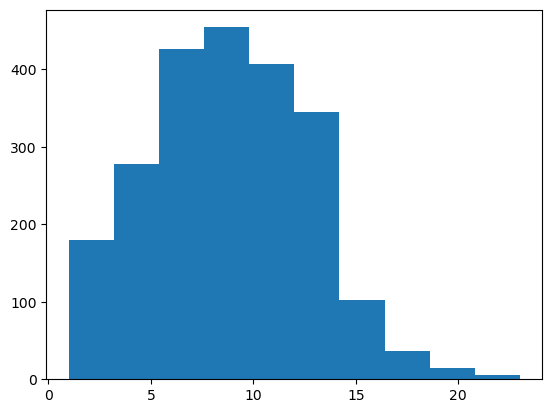

In [7]:
import matplotlib.pyplot as plt
plt.hist(num_topics_used)

In [8]:
for ti in range(10):
    words = model.show_topic(ti, 64)
    print (words)
    print()

[('tax', 0.019159146), ('jackson', 0.00981407), ('mad', 0.008899845), ('taxpayers', 0.00789059), ('dukakis', 0.006858702), ('i', 0.0061238282), ('tribune', 0.0053280345), ('american', 0.0052874116), ('reform', 0.005273136), ('deductions', 0.0050347517), ('bush', 0.0049773655), ('outrage', 0.0048239944), ('year', 0.004389432), ('new', 0.0042888755), ('people', 0.0042749), ('panamanian', 0.004151091), ('treasure', 0.0041468577), ('illinois', 0.0041255862), ('president', 0.003771164), ('two', 0.0037396739), ('wis', 0.0037107621), ('last', 0.0036119947), ('support', 0.0035580818), ('dinner', 0.0035353526), ('mate', 0.0033496686), ('dan', 0.0033446557), ('chicago', 0.0033397358), ('cove', 0.003312284), ('aides', 0.0033060026), ('washington', 0.0032483707), ('government', 0.003151824), ('species', 0.0030812444), ('cream', 0.003001809), ('democratic', 0.0029750166), ('flower', 0.0029383374), ('house', 0.0029155142), ('preferred', 0.0028848618), ('panama', 0.0028771355), ('solomon', 0.00282941

In [12]:
#вывод 10 тем с 10 словами в каждой и их вероятностями
print(model.print_topics(num_topics=10, num_words=10))

[(85, '0.010*"foreigners" + 0.009*"langley" + 0.009*"publication" + 0.009*"filipino" + 0.007*"air" + 0.007*"two" + 0.007*"jones" + 0.006*"pair" + 0.006*"force" + 0.005*"magazines"'), (43, '0.015*"new" + 0.011*"york" + 0.011*"bank" + 0.008*"market" + 0.008*"cents" + 0.007*"trading" + 0.007*"higher" + 0.007*"london" + 0.006*"tuesday" + 0.006*"gold"'), (11, '0.017*"tiananmen" + 0.006*"new" + 0.005*"chinas" + 0.005*"i" + 0.004*"manufacturer" + 0.004*"dingell" + 0.004*"boxes" + 0.004*"appearing" + 0.004*"two" + 0.004*"valve"'), (31, '0.027*"united" + 0.015*"states" + 0.010*"debut" + 0.009*"unification" + 0.008*"discussing" + 0.006*"soviet" + 0.005*"opera" + 0.005*"troops" + 0.005*"american" + 0.004*"bush"'), (17, '0.023*"barr" + 0.016*"film" + 0.013*"snake" + 0.012*"kahane" + 0.010*"bail" + 0.009*"nosair" + 0.009*"suits" + 0.006*"new" + 0.005*"nelson" + 0.005*"year"'), (50, '0.012*"i" + 0.009*"champion" + 0.007*"people" + 0.006*"dukakis" + 0.006*"editors" + 0.006*"salvage" + 0.006*"year" + 

4 Выполнить предобработку текстов из ap.txt – удаление стоп-слов, стемминг или лемматизацию. Сформировать новые ap.dat и vocab.txt

In [19]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)


def preprocess(text):
    from nltk.tokenize import sent_tokenize
    from string import punctuation
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    sentences = sent_tokenize(text)
    # Lower case
    sentences = [sentence.lower() for sentence in sentences]
    # Remove punctuation
    sentences = [
        "".join(c for c in sentence if c not in punctuation) for sentence in sentences
    ]
    # Tokenize words
    sentences = [word_tokenize(sentence) for sentence in sentences]
    # Remove stopwords
    stop_words = stopwords.words("english")
    sentences = [
        [word for word in sentence if word not in stop_words] for sentence in sentences
    ]
    # Remove links
    sentences = [
        [word for word in sentence if not word.startswith("http")]
        for sentence in sentences
    ]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    sentences = [
        [lemmatizer.lemmatize(word) for word in sentence] for sentence in sentences
    ]
    words = " ".join([" ".join(sentence) for sentence in sentences])
    return words

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [52]:
import pandas as pd

from bs4 import BeautifulSoup

with open("./ap/ap/ap.txt") as f:
    content = f.readlines()

content = [x.strip() for x in content]
content = " ".join(content)

soup = BeautifulSoup(content, "lxml")
texts = soup.findAll("text")

texts = [text.text for text in texts]
texts = pd.DataFrame(texts, columns=["text"])

texts.head()

In [54]:
# Write first 5 <TEXT> elements



,text
0,A 16-year-old student at a private Baptist sc...
1,The Bechtel Group Inc. offered in 1985 to sel...
2,A gunman took a 74-year-old woman hostage aft...
3,"Today is Saturday, Oct. 29, the 303rd day of ..."
4,Cupid has a new message for lovers this Valen...
